In [1]:
from prophet import Prophet
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data_daily_ts.csv')
data.head()

,Unnamed: 0,Itemname,Quantity,Date,Price,Country,Price_Total
0,0,white hanging heart t-light holder,6,2010-12-01,2.55,United Kingdom,15.30
1,1,white metal lantern,6,2010-12-01,3.39,United Kingdom,20.34
2,2,cream cupid hearts coat hanger,8,2010-12-01,2.75,United Kingdom,22.00
3,3,knitted union flag hot water bottle,6,2010-12-01,3.39,United Kingdom,20.34
4,4,red woolly hottie white heart.,6,2010-12-01,3.39,United Kingdom,20.34


In [6]:
df_data_group = data.groupby(by="Date",sort=True).agg({"Quantity":"mean","Price_Total":"mean"})

In [7]:
df_data_group

,Quantity,Price_Total
Date,,
2010-12-01,8.743363,19.143038
2010-12-02,15.190592,23.145432
2010-12-03,6.581643,21.433266
2010-12-05,6.074594,11.733733
2010-12-06,5.603439,14.192582
...,...,...
2011-12-05,8.382599,16.676911
2011-12-06,9.340282,17.386024
2011-12-07,17.932554,32.186272


In [12]:
df_data_group.drop(columns=["Date"],inplace=True)

In [15]:
df_data_group.reset_index(inplace=True)

In [16]:
df_data_group

,Date,Quantity,Price_Total
0,2010-12-01,8.743363,19.143038
1,2010-12-02,15.190592,23.145432
2,2010-12-03,6.581643,21.433266
3,2010-12-05,6.074594,11.733733
4,2010-12-06,5.603439,14.192582
...,...,...,...
300,2011-12-05,8.382599,16.676911
301,2011-12-06,9.340282,17.386024
302,2011-12-07,17.932554,32.186272
303,2011-12-08,7.148905,16.978282


In [21]:
df_data_group.Quantity.mean()

10.371329959126827

In [22]:
df_data_group.Price_Total.mean()

19.522372374196816

In [23]:
df_data_group.Quantity.replace(0,10.09, inplace=True)

In [24]:
df_data_group.Quantity.replace(0,19.52, inplace=True)

In [25]:
df_data_group

,Date,Quantity,Price_Total
0,2010-12-01,8.743363,19.143038
1,2010-12-02,15.190592,23.145432
2,2010-12-03,6.581643,21.433266
3,2010-12-05,6.074594,11.733733
4,2010-12-06,5.603439,14.192582
...,...,...,...
300,2011-12-05,8.382599,16.676911
301,2011-12-06,9.340282,17.386024
302,2011-12-07,17.932554,32.186272
303,2011-12-08,7.148905,16.978282


In [26]:
df_data_group

,Date,Quantity,Price_Total
0,2010-12-01,8.743363,19.143038
1,2010-12-02,15.190592,23.145432
2,2010-12-03,6.581643,21.433266
3,2010-12-05,6.074594,11.733733
4,2010-12-06,5.603439,14.192582
...,...,...,...
300,2011-12-05,8.382599,16.676911
301,2011-12-06,9.340282,17.386024
302,2011-12-07,17.932554,32.186272
303,2011-12-08,7.148905,16.978282


In [28]:
quanitity_df = df_data_group.drop(columns=['Price_Total'])

In [29]:
price_total_df= df_data_group.drop(columns=['Quantity'])

In [30]:
price_total_df

,Date,Price_Total
0,2010-12-01,19.143038
1,2010-12-02,23.145432
2,2010-12-03,21.433266
3,2010-12-05,11.733733
4,2010-12-06,14.192582
...,...,...
300,2011-12-05,16.676911
301,2011-12-06,17.386024
302,2011-12-07,32.186272
303,2011-12-08,16.978282


# Fazendo a modelagem pelo preço

Feature engineering

In [31]:
prophet_df = price_total_df.rename(columns = {'Date':'ds', 'Price_Total':'y'})

In [32]:
prophet_df

,ds,y
0,2010-12-01,19.143038
1,2010-12-02,23.145432
2,2010-12-03,21.433266
3,2010-12-05,11.733733
4,2010-12-06,14.192582
...,...,...
300,2011-12-05,16.676911
301,2011-12-06,17.386024
302,2011-12-07,32.186272
303,2011-12-08,16.978282


modelagem

In [33]:
model = Prophet()

In [34]:
model.add_country_holidays(country_name='BR')

In [35]:
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = model.make_future_dataframe(periods = 365)

In [37]:
forecast = model.predict(future)

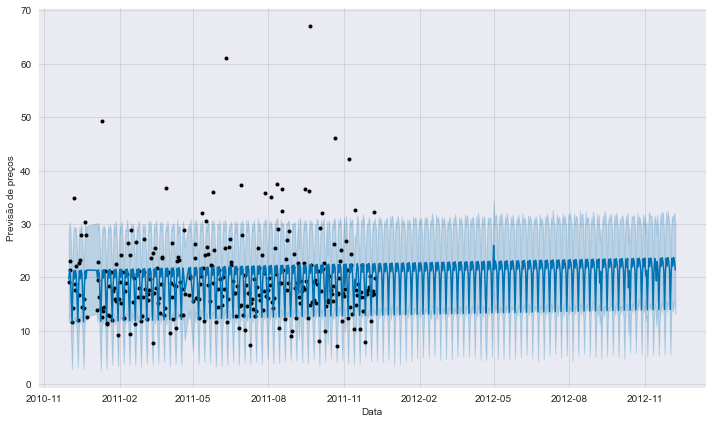

In [38]:
model.plot(forecast, xlabel='Data', ylabel='Previsão de preços');

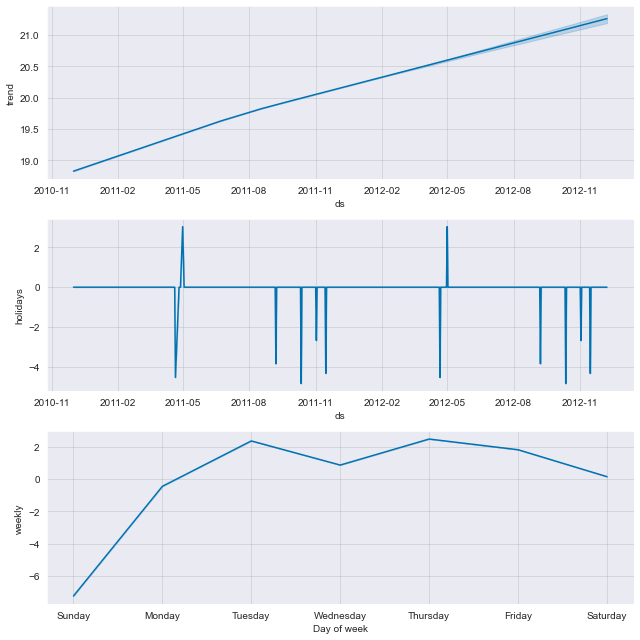

In [39]:
model.plot_components(forecast);

validação

In [40]:
from prophet.diagnostics import cross_validation
df_cv_p = cross_validation(model, horizon = '30 days')
df_cv_p.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-14 00:00:00 and 2011-11-09 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-15,22.379209,15.875365,29.331214,17.022769,2011-03-14
1,2011-03-16,18.163288,10.976589,25.035770,25.432630,2011-03-14
2,2011-03-17,18.742852,12.302764,25.289768,18.015291,2011-03-14
3,2011-03-18,19.936269,13.445303,26.835844,21.682277,2011-03-14
4,2011-03-20,10.770615,3.981421,17.197490,15.141595,2011-03-14


In [41]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv_p)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,30.073462,5.483928,4.350642,0.274179,0.222206,0.233102,0.802721
1,5 days,31.316621,5.596125,4.215841,0.243782,0.206724,0.215829,0.802721
2,6 days,30.035034,5.480423,4.014453,0.228515,0.159709,0.205970,0.809524
3,7 days,29.719970,5.451602,4.142078,0.210978,0.159709,0.205095,0.863946
4,8 days,33.695326,5.804768,4.693311,0.251115,0.212174,0.235664,0.819048


C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


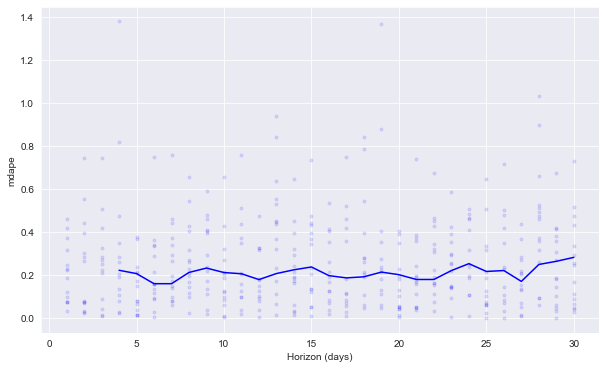

In [42]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_p, metric='mdape');

C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


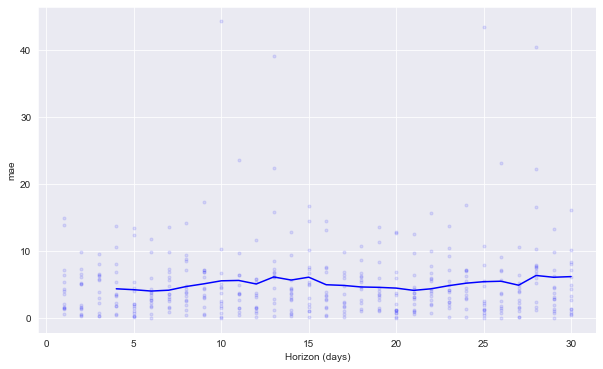

In [43]:
fig = plot_cross_validation_metric(df_cv_p, metric='mae')

Hyperparameters tunning

In [44]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='31 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000025B549579A0>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000025B5E19D730>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  7.420673
1                     0.001                     0.10  7.343170
2                     0.001                     1.00  7.327919
3                     0.001                    10.00  7.332281
4                     0.010                     0.01  7.416256
5                     0.010                     0.10  7.332304
6                     0.010                     1.00  7.351146
7                     0.010                    10.00  7.309739
8                     0.100                     0.01  7.501649
9                     0.100                     0.10  7.352497
10                    0.100                     1.00  7.357588
11                    0.100                    10.00  7.357628
12                    0.500                     0.01  7.791442
13                    0.500                     0.10  7.689861
14                    0.500                     1.00  7

In [45]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}


criamos o modelo passando os novos parametros, e treinamos os mesmo

## Model Quantity

In [46]:
quanitity_df

,Date,Quantity
0,2010-12-01,8.743363
1,2010-12-02,15.190592
2,2010-12-03,6.581643
3,2010-12-05,6.074594
4,2010-12-06,5.603439
...,...,...
300,2011-12-05,8.382599
301,2011-12-06,9.340282
302,2011-12-07,17.932554
303,2011-12-08,7.148905


Feature engineering

In [47]:
prophet_df_quant = quanitity_df.rename(columns = {'date':'ds', 'quantity':'y'})

modelagem

In [48]:
model_q = Prophet()
model_q.add_country_holidays(country_name='BR')
model_q.fit(prophet_df_quant)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
future = model_q.make_future_dataframe(periods = 365)
forecast = model_q.predict(future)

In [ ]:
model_q.plot(forecast, xlabel='Data', ylabel='Previsão dea quantidade de produtos vendido no dia');

validacao

In [ ]:
df_cv = cross_validation(model_q, horizon = '30 days')
df_cv.head()

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

Olhar outras variantes

hyperparametros

In [ ]:


param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_df_quant)  # Fit model with given params
    df_cv = cross_validation(m, horizon='31 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

Criamos o modelo passando os novos parametros, e treinamos os mesmo